In [53]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
#from mlp_toolkits.mplot3d import Axes3D


In [37]:
#from google.colab import drive
#drive.mount('/content/drive')

In [38]:
data = pd.read_csv('./mantenimiento.csv')

110000


Se crearan 3 nuevas columnas para anadir al dataset:
* Antiguedad (N,S,V)
* Estado Bateria (Muy buena, regular, mala)
* Recibio otro mantenimiento (1,0)

In [39]:
dataAntiguedad = ['N','S','V']
dataStatusBatery = ["Muy buena", "Regular","mala"]
dataMantenimientoPrevio = [1,0]

columnaAntiguedad = np.random.choice(dataAntiguedad, 10000)
columnaBateria = np.random.choice(dataStatusBatery, 10000)
columnaMantenimientoPrevio = np.random.choice(dataMantenimientoPrevio, 10000)

print(columnaAntiguedad.size)
print(columnaBateria.size)
print(columnaMantenimientoPrevio.size)


10000
10000
10000


In [35]:
datasintetico = data.copy()
datasintetico['Antiguedad'] = columnaAntiguedad
datasintetico['Bateria Status'] = columnaBateria
datasintetico['Mantenimiento previo'] = columnaMantenimientoPrevio
print(data.shape)
print(datasintetico.shape)

(10000, 14)
(10000, 17)


Duplicando Datos

In [40]:
def duplicarDatos(oldata):
    newdata = oldata.copy()
    for column in oldata.columns:
        if np.issubdtype(oldata[column].dtype, np.number):
            media = oldata[column].mean()
            deSt = oldata[column].std()
            newdata[column] = oldata[column] + np.random.normal(0, deSt * 0.1, size=len(oldata))
        
        else:
            
            unique_values = oldata[column].unique() 
            newdata[column] = np.random.choice(unique_values, size=len(oldata))  


    datosConcatenados = pd.concat([oldata, newdata], ignore_index=True)
    
    return datosConcatenados

In [42]:
print(data.shape)
print(datasintetico.shape)

data = duplicarDatos(data)
datasintetico = duplicarDatos(datasintetico)

print(data.shape)
print(datasintetico.shape)

(20000, 14)
(20000, 17)
(40000, 14)
(40000, 17)


In [58]:
def plotData(x, y):

    fig = pyplot.figure()

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('temperatura CPI')
    pyplot.xlabel('Temperatura Aire')


In [59]:
print(data.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


40000
40000


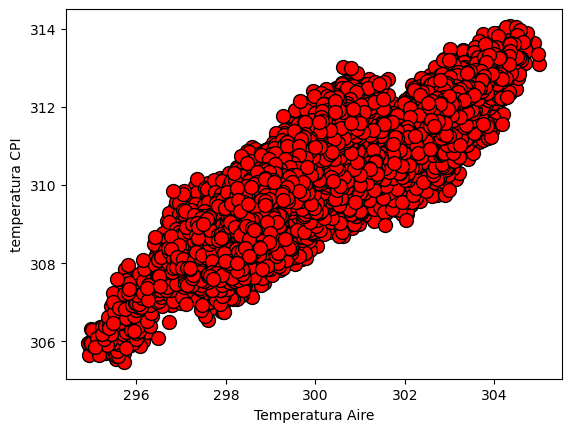

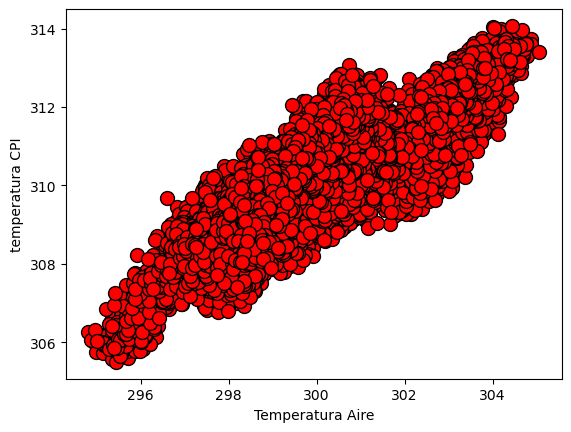

In [60]:
X = data.iloc[:,3:4].values
y = data.iloc[:,4:5].values
print(y.size)
plotData(X,y)

Xs = datasintetico.iloc[:,3:4].values
ys = datasintetico.iloc[:,4:5].values
print(ys.size)
plotData(Xs,ys)


#### Separar en datos de Training y test
20000 * 0.8 = 16000 Training
20000 * 0.2 = 4000  Test


40000 * 0.8 = 32000 Training
40000 * 0.2 = 8000  Test

In [67]:
PorcentajeTraining = 0.8
PorcentajeTest = 0.2
tamano = datasintetico.shape[0]
SizeTraining = int(tamano * PorcentajeTraining)


Xtrain = datasintetico.iloc[:SizeTraining,2:3]
Ytrain = datasintetico.iloc[:SizeTraining,3:]
Xtest = datasintetico.iloc[SizeTraining:,2:3]
ytest = datasintetico.iloc[SizeTraining:,2:3]

print(Xtrain.size)
print(Xtest.size)


32000
8000
